In [2]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_class.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,Smoker,Snorer,Illness,OSA,BMI
0,P0002,1,29.6,119,174,56,48.0,5,4,2,Mild,39.305060
1,P0004,1,19.7,78,168,39,42.0,2,4,2,Mild,27.636054
2,P0005,1,9.0,80,173,32,40.0,2,4,2,Healthy,26.729927
3,P0006,1,2.0,109,190,32,42.0,2,4,2,Healthy,30.193906
4,P0007,1,34.0,86,169,39,42.0,2,4,2,Severe,30.110991


In [3]:
df = df.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
df.head()

,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI
0,P0002,1,119,174,56,48.0,Mild,39.305060
1,P0004,1,78,168,39,42.0,Mild,27.636054
2,P0005,1,80,173,32,40.0,Healthy,26.729927
3,P0006,1,109,190,32,42.0,Healthy,30.193906
4,P0007,1,86,169,39,42.0,Severe,30.110991


In [ ]:
#Index transformation--> NO HACE FALTA (?)wtf
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['OSA']=le.fit_transform(df['OSA'])


In [ ]:
df.head()

In [4]:
df.set_index('Patient', inplace=True)

In [5]:
df.head()

,Gender,Weight,Height,Age,Cervical,OSA,BMI
Patient,,,,,,,
P0002,1,119,174,56,48.0,Mild,39.305060
P0004,1,78,168,39,42.0,Mild,27.636054
P0005,1,80,173,32,40.0,Healthy,26.729927
P0006,1,109,190,32,42.0,Healthy,30.193906
P0007,1,86,169,39,42.0,Severe,30.110991


In [6]:
#features 
predictors = ['Gender','Weight', 'Height', 'Age', 'Cervical', 'BMI']
x = df[predictors].values
y = df['OSA'].values

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 8))
plt.scatter(x[:,0], x[:,1],c=y)
plt.show()

# Logistic regression 
### Grid search

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

### grid search with splitted data ? no tiene sentido hacer esto diria yo

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg_1 = LogisticRegression()
logreg_1_cv = GridSearchCV(logreg_1,param_grid,cv = 10)
logreg_1_cv.fit(x_train,y_train)

In [ ]:
print("tuned hyperparameters: (best parameters): ", logreg_1_cv.best_params_)
print("accuracy: ", logreg_1_cv.best_score_)

### grid search with  NO splitted data

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg_2 = LogisticRegression()
logreg_2_cv = GridSearchCV(logreg_2,param_grid,cv = 10)
logreg_2_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ", logreg_2_cv.best_params_)
print("accuracy: ", logreg_2_cv.best_score_)

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

tuned hyperparameters: (best parameters):  {'C': 100.0, 'penalty': 'l2'}
accuracy:  0.505530753968254


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(x.shape)
print(y.shape)

In [ ]:
df['OSA'].dtypes

### kfold (mucho lio)

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

              precision    recall  f1-score   support

     Healthy       0.55      0.61      0.58        54
        Mild       0.29      0.31      0.30        39
      Severe       0.58      0.44      0.50        34

    accuracy                           0.47       127
   macro avg       0.47      0.45      0.46       127
weighted avg       0.48      0.47      0.47       127

Confusion matrix, without normalization
[[33 19  2]
 [18 12  9]
 [ 9 10 15]]
Iteration 1:accuracy=0.4724 f1=0.4722
              precision    recall  f1-score   support

     Healthy       0.59      0.56      0.57        52
        Mild       0.46      0.44      0.45        50
      Severe       0.37      0.44      0.40        25

    accuracy                           0.49       127
   macro avg       0.47      0.48      0.47       127
weighted avg       0.49      0.49      0.49       127

Confusion matrix, without normalization
[[29 17  6]
 [15 22 13]
 [ 5  9 11]]
Iteration 2:accuracy=0.4882 f1=0.4906


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

              precision    recall  f1-score   support

     Healthy       0.59      0.70      0.64        46
        Mild       0.47      0.52      0.49        44
      Severe       0.62      0.41      0.49        37

    accuracy                           0.55       127
   macro avg       0.56      0.54      0.54       127
weighted avg       0.56      0.55      0.55       127

Confusion matrix, without normalization
[[32 11  3]
 [15 23  6]
 [ 7 15 15]]
Iteration 3:accuracy=0.5512 f1=0.5465
              precision    recall  f1-score   support

     Healthy       0.52      0.82      0.64        45
        Mild       0.51      0.35      0.41        52
      Severe       0.48      0.33      0.39        30

    accuracy                           0.51       127
   macro avg       0.50      0.50      0.48       127
weighted avg       0.51      0.51      0.49       127

Confusion matrix, without normalization
[[37  6  2]
 [25 18  9]
 [ 9 11 10]]
Iteration 4:accuracy=0.5118 f1=0.4881
        

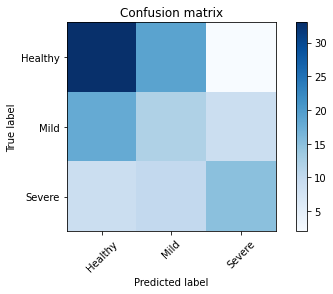

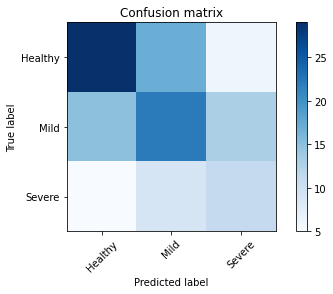

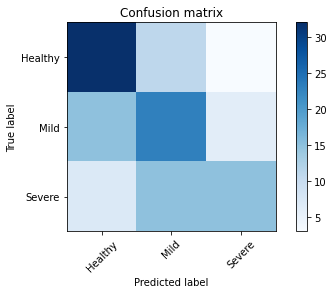

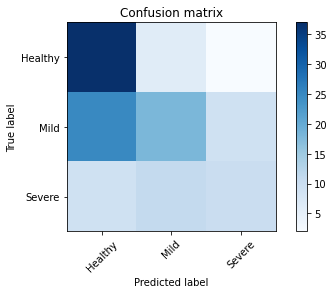

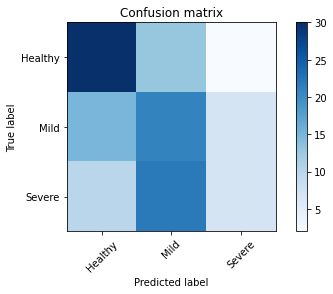

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import metrics

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#outcomes = encode_text_index(df, 'OSA')
outcomes = ['Healthy', 'Mild', 'Severe']

k = 5
kf = KFold(n_splits=k)
precisions = []
i = 0
accuracy_global = []
f1_global = []

for train, test in kf.split(x):
    i+=1
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    model = LogisticRegression(C=10, penalty='l2').fit(x_train,y_train)
    y_out = model.predict(x_test)
    
    accuracy = metrics.accuracy_score(y_test, y_out)
    f1_score = metrics.f1_score(y_test, y_out, average="weighted")
   
    accuracy_global.append(accuracy)
    f1_global.append(f1_score)
    #print(metrics.confusion_matrix(y_test, y_out))
    print(metrics.classification_report(y_test, y_out))
    
    ### PLOT CONFUSION MATRIX ###

    # Not normalized
    cm = metrics.confusion_matrix(y_test, y_out)
    np.set_printoptions(precision=2)
    print('Confusion matrix, without normalization')
    print(cm)
    plt.figure()
    plot_confusion_matrix(cm, outcomes)

    print("Iteration {}:accuracy={:.4f} f1={:.4f}".format(i, accuracy, f1_score))
print("Global: accuracy={:.4f} f1={:.4f}\n".format(np.average(accuracy_global), np.average(f1_global)))



### cross_val

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection

log_reg_1 = LogisticRegression(C = 10, penalty='l2')
mse_lin_2 = cross_val_score(model_linear, x, y, cv = 3, scoring = 'neg_mean_squared_error')



# KNN

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {"n-"}

logreg_2 = LogisticRegression()
logreg_2_cv = GridSearchCV(logreg_2,param_grid,cv = 10)
logreg_2_cv.fit(x_train,y_train)

print("tuned hyperparameters: (best parameters): ", logreg_2_cv.best_params_)
print("accuracy: ", logreg_2_cv.best_score_)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn import metrics

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

k = 5
kf = KFold(n_splits=k)
precisions = []
i = 0
accuracy_global = []
f1_global = []

for train, test in kf.split(x):
    i+=1
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    model = KNeighborsClassifier(n_neighbors=4).fit(x_train,y_train)
    y_out = model.predict(x_test)
    
    # Measure accuracy
    score = metrics.accuracy_score(y_test, y_out)
    accuracy_global.append(accuracy)
    
    print("Iteration {}:accuracy={:.4f}".format(i, accuracy))
print("Global: accuracy={:.4f} \n".format(np.average(accuracy_global)))
